### First attempt to have a common Gemeente DataLab visual plotting style

In [1]:
# For setting parameters, use matplotlib (mpl) directly
import matplotlib as mpl
import matplotlib.image as image # for Gemeente logo
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.rcsetup import cycler # 
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '/home/ams/pyprojects/data-processing/transform/data_visualization/')

Guidelines for coloring maps with sequential, divergent, and qualitative colors, being available @ http://colorbrewer2.org/, added to Python through the package brewer2mpl for use in matplotlib.

In [2]:
# pip install brewer2mpl
import brewer2mpl

# look at the map @http://colorbrewer2.org, pick a set and map to a variable
gmap = brewer2mpl.get_map('YlOrRd', 'Sequential', 7)
colors= gmap.mpl_colors

#mpl.rcParams['axes.prop_cycle'].by_key()['color'] = colors

In [215]:
# Pretty plotting settings
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['axes.color_cycle'] = colors
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['font.size'] = 14
mpl.rcParams['patch.edgecolor'] = 'white'
mpl.rcParams['patch.facecolor'] = colors[0]
mpl.rcParams['font.family'] = 'StixGeneral'


def datalab_default(axes=None, top=False, right=False, left=True, bottom=True, 
                  grid=None, title=None):
    """
    Minimize chartjunk - stripping out unnecessary borders + axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #re-enable visibles for tweaking
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
    
    if grid is not None:
        for g in grid:
            assert g in ('x', 'y')
            ax.grid(axis=grid, color='gray', linestyle='--', linewidth=0.3, alpha=.6)
    
    if title:
        ax.set_title(label = title)

/home/diederik/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [217]:
def add_datalab_logo():
    
    # adding Gemeente Watermark Image on the bottom-left of the plot
    logo = image.imread('AMS.jpg')
    ax.figure.figimage(logo, 60, -20, alpha=.2, zorder=1)
    return ax

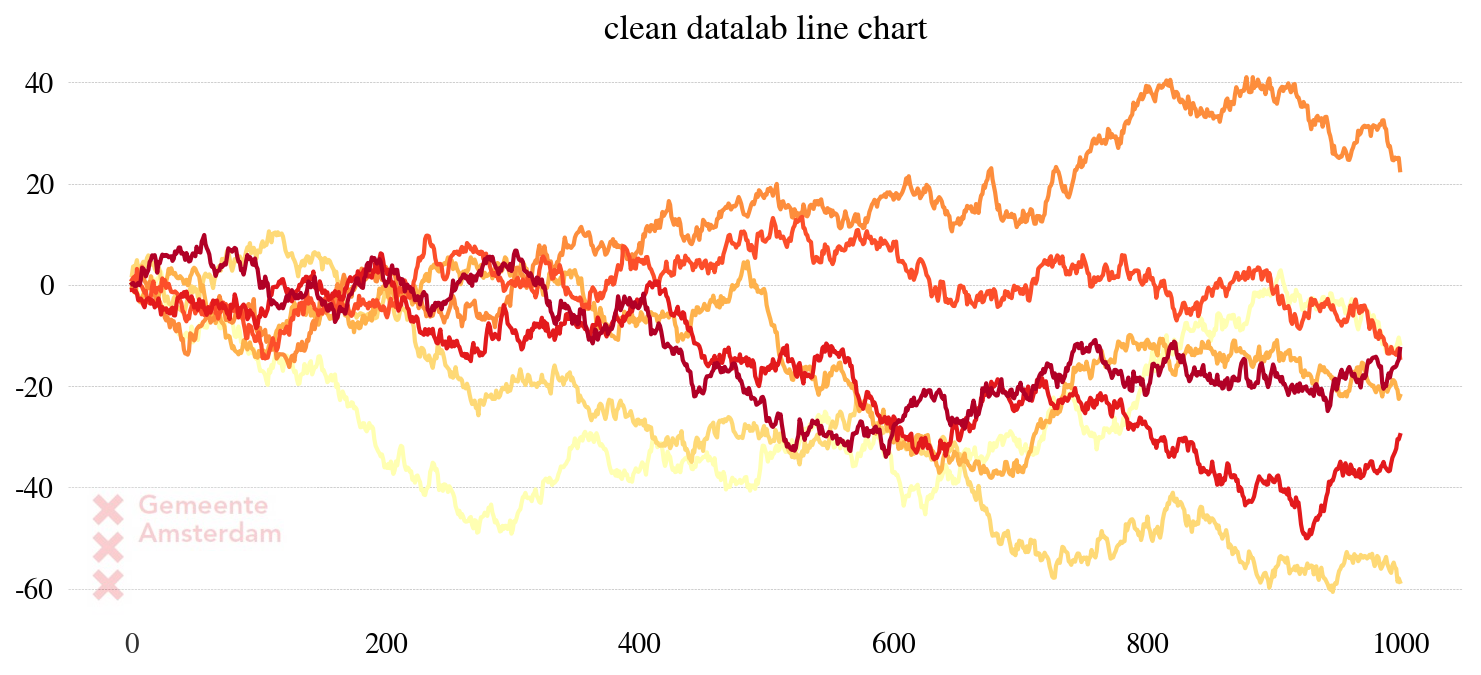

In [219]:
# test on some random data
np.random.seed(12)

fig, ax = plt.subplots(1,1, figsize = [12,5])
datalab_default(left=False, bottom=False, grid='y', title='clean datalab line chart')
add_datalab_logo()
for i in range(7):
    ax.plot(np.random.randn(1000).cumsum())
    ax.yaxis.set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: '{}'.format(int(x), ',')))